##  Linear Data:
- logistic regression.
- SVM(Support Vector Machine)

## Non Linear Data :
- KNN
- Decision Tree
- Random Forest
- Naive Bayes Classifier etc

### Decision(user for both regression and classification) :

### ID3 Algorithm :
- entropy --> uncertainity in data.
- information gain --> difference between entropy before and after splitting the data.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_df['target'].unique()

array([0, 1, 2])

In [16]:
x = iris_df.drop('target', axis = 1)

In [17]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = iris_df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=1)

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [49]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy_score(y_test, y_pred)

0.9555555555555556

In [52]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [53]:
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array-like, default=None
        The set of labels to include when ``average

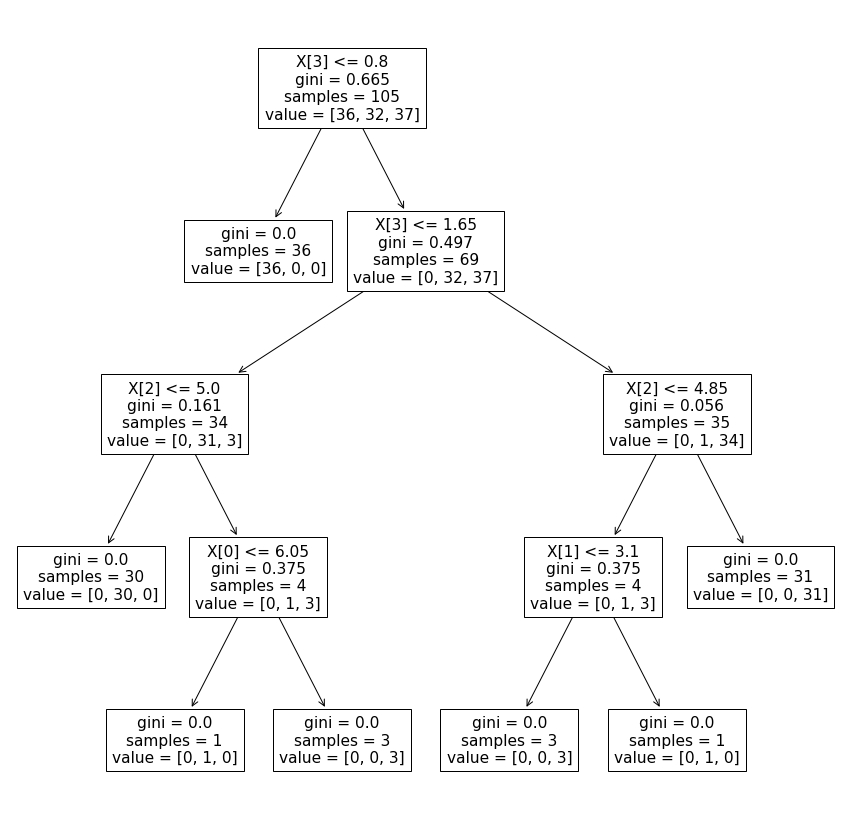

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
tree.plot_tree(model)
plt.show()

In [33]:
model = DecisionTreeClassifier(criterion='entropy')

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy_score(y_test, y_pred)

0.9555555555555556

In [45]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

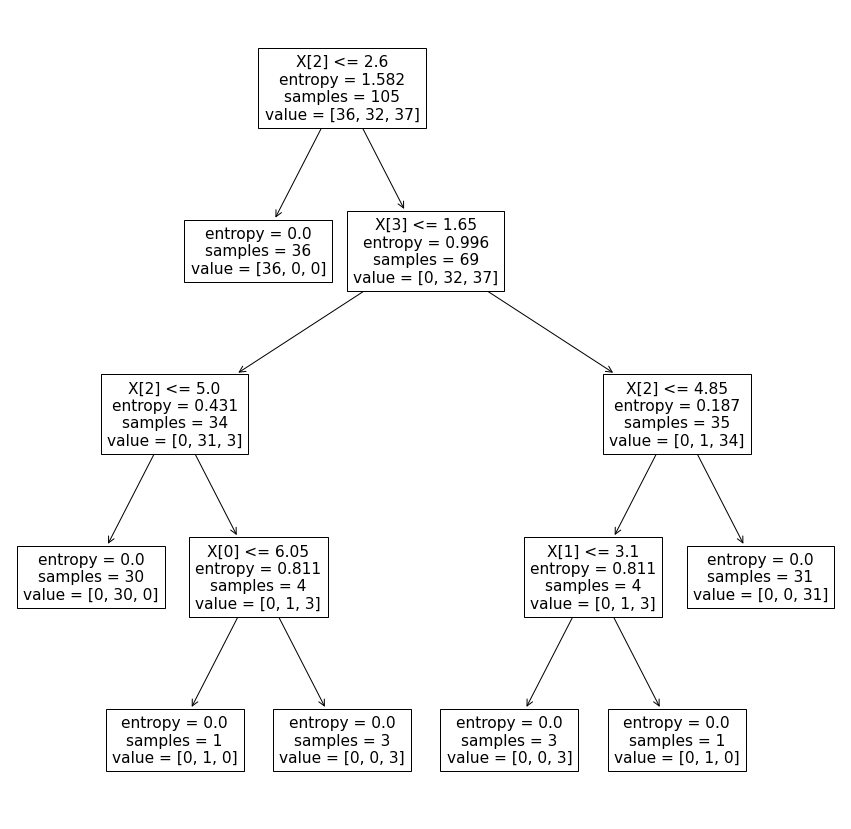

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
tree.plot_tree(model)
plt.show()

### Task apply this on heart disease

In [56]:
df = pd.read_csv("heart.csv")

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
x = df.drop('target', axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [59]:
y = df['target']

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state = 5)

In [109]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [110]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [111]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy_score(y_test, y_pred)*100

73.23943661971832

In [97]:
confusion_matrix(y_test, y_pred)

array([[68, 35],
       [24, 86]], dtype=int64)

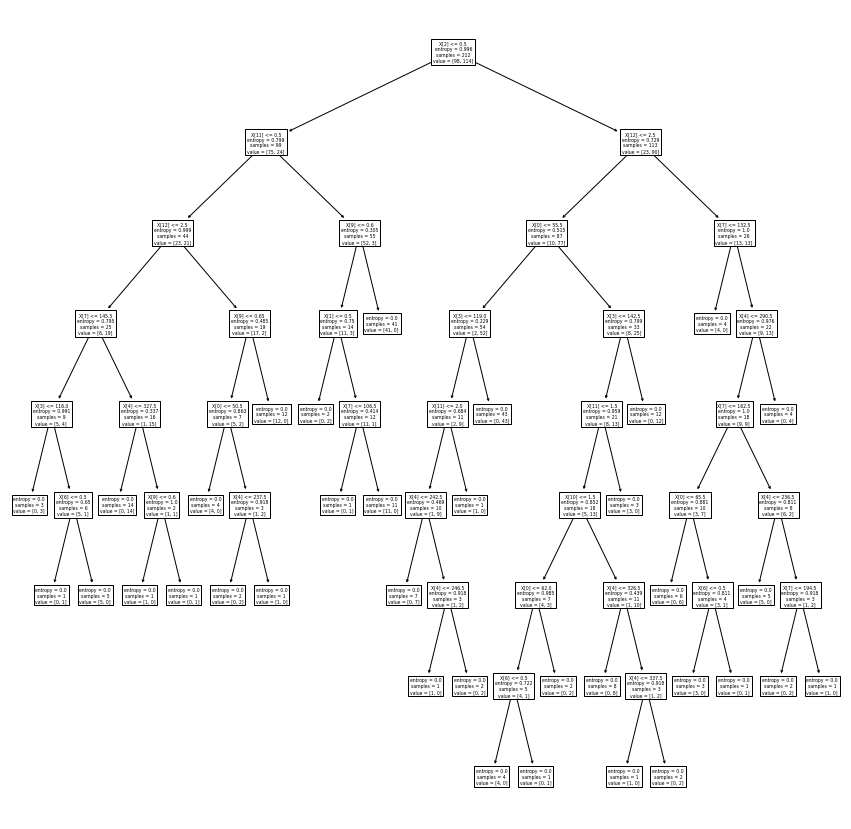

In [72]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
tree.plot_tree(model)
plt.show()

## Decision Tree Regression:

In [113]:
df = pd.read_csv('age_salary_hours.csv')

In [114]:
df

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher
...,...,...,...,...
495,27,47000.0,40.0,Bachelor's degree or higher
496,53,132000.0,70.0,Bachelor's degree or higher
497,51,10100.0,20.0,Bachelor's degree or higher
498,32,57000.0,35.0,Bachelor's degree or higher


In [115]:
df['Annual Salary'].unique()

array([1.60e+05, 1.00e+05, 1.20e+05, 4.50e+04, 8.50e+04, 1.20e+04,
       0.00e+00, 5.50e+04, 6.50e+04, 8.20e+04, 6.38e+05, 6.00e+04,
       2.50e+03, 3.50e+04, 2.25e+05, 5.00e+04, 3.70e+04, 4.00e+04,
       8.00e+04, 3.00e+04, 9.00e+02, 4.42e+04, 1.75e+05, 2.30e+04,
       4.61e+04, 2.80e+04, 9.70e+04, 3.80e+04, 1.30e+04, 1.00e+04,
       7.80e+04, 6.30e+03, 9.00e+04, 2.20e+04, 1.25e+05, 7.00e+04,
       2.00e+05, 3.78e+04, 3.60e+04, 8.50e+03, 2.00e+03, 1.30e+03,
       1.60e+04, 5.10e+03, 5.40e+04, 7.50e+04, 1.50e+04, 1.80e+04,
       3.83e+04, 1.40e+04, 6.80e+04, 4.75e+04, 3.85e+04, 2.08e+04,
       3.30e+03, 1.90e+05, 8.60e+04, 6.50e+03, 2.70e+04, 8.80e+03,
       5.60e+04, 1.85e+05, 3.10e+04, 1.55e+04, 1.80e+05, 5.10e+04,
       3.20e+04, 1.60e+03, 3.80e+03, 5.90e+04, 4.69e+04, 1.15e+05,
       4.60e+04, 7.90e+04, 1.56e+04, 8.00e+03, 7.70e+04, 3.00e+03,
       1.35e+05, 1.65e+05, 9.00e+03, 8.40e+03, 7.00e+03, 6.60e+04,
       2.90e+04, 1.19e+05, 1.00e+03, 7.20e+04, 2.00e+04, 6.00e

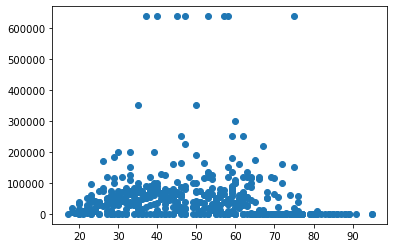

In [117]:
plt.scatter(df['Age'], df['Annual Salary'])

In [119]:
df.isna().sum()

Age              0
Annual Salary    0
Weekly hours     0
Education        0
dtype: int64

In [124]:
x = df.loc[:, ['Age', 'Weekly hours']]
x

,Age,Weekly hours
0,72,40.0
1,72,50.0
2,31,40.0
3,28,40.0
4,54,40.0
...,...,...
495,27,40.0
496,53,70.0
497,51,20.0
498,32,35.0


In [125]:
y = df['Annual Salary']
y

0      160000.0
1      100000.0
2      120000.0
3       45000.0
4       85000.0
         ...   
495     47000.0
496    132000.0
497     10100.0
498     57000.0
499     18700.0
Name: Annual Salary, Length: 500, dtype: float64

In [133]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state = 1)

In [142]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)

In [143]:
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [144]:
y_pred = model.predict(x_test)
y_pred

array([1.29318182e+05, 1.29318182e+05, 5.85046875e+04, 2.70270270e-01,
       5.85046875e+04, 2.70270270e-01, 5.85046875e+04, 5.85046875e+04,
       1.29318182e+05, 2.70270270e-01, 1.29318182e+05, 1.29318182e+05,
       1.26800000e+04, 5.85046875e+04, 2.70270270e-01, 2.70270270e-01,
       5.85046875e+04, 5.85046875e+04, 5.85046875e+04, 2.70270270e-01,
       5.85046875e+04, 2.70270270e-01, 1.29318182e+05, 5.85046875e+04,
       5.85046875e+04, 5.85046875e+04, 2.70270270e-01, 2.70270270e-01,
       2.70270270e-01, 1.26800000e+04, 5.85046875e+04, 1.29318182e+05,
       5.85046875e+04, 1.29318182e+05, 1.29318182e+05, 1.26800000e+04,
       5.85046875e+04, 5.85046875e+04, 1.26800000e+04, 2.70270270e-01,
       2.70270270e-01, 5.85046875e+04, 2.70270270e-01, 2.73600000e+04,
       2.70270270e-01, 2.70270270e-01, 2.70270270e-01, 2.73600000e+04,
       6.38000000e+05, 2.70270270e-01, 5.85046875e+04, 2.70270270e-01,
       5.85046875e+04, 5.85046875e+04, 2.70270270e-01, 2.70270270e-01,
      

In [145]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test, y_pred)*100

-32.01501862339773

In [146]:
mean_squared_error(y_test, y_pred)

10797938431.36734

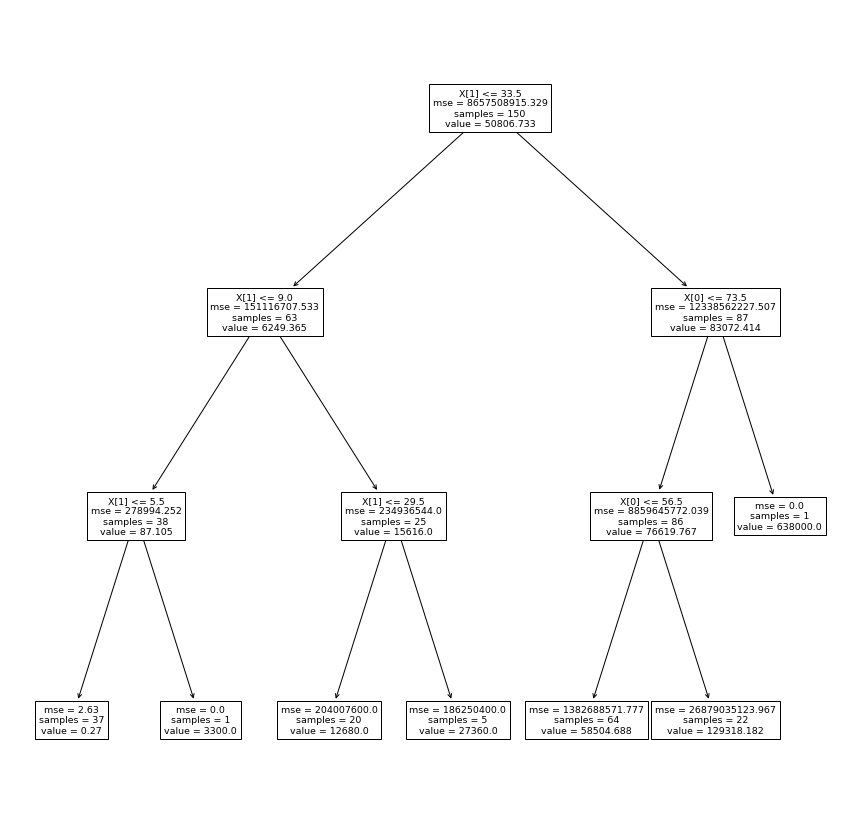

In [147]:
plt.figure(figsize = (15, 15))
tree.plot_tree(model)
plt.show()

### TASK : 
- Apply decision tree regressor for insurance dataset.